<a href="https://colab.research.google.com/github/DanaW-HIT/CarPricePredictor/blob/main/assign2carPricepred207915158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libreries:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import math
from matplotlib.colors import ListedColormap
from itertools import count
from sklearn.metrics import explained_variance_score
%matplotlib inline

Data processing:

In [6]:
## Data Processing
df = pd.read_csv("train-data.csv") 
df['Engine'] = df['Engine'].str.strip(" CC")
df['Mileage'] =  df['Mileage'].str.strip(" kmpl").str.strip(' km/kg')
df['Power'] = df['Power'].str.strip(" bhp").str.replace('null', '0')
df = df.drop(['New_Price', 'Unnamed: 0'], axis=1)
df['Mileage'] = df.Mileage.astype(float)
df['Engine'] = df.Engine.astype(float)
df['Power'] = df.Power.astype(float)
## Channging unnumerricak data to nummerical data:
# first we'll change name:
dictname = {}
name = df['Name'].unique()
for i in list(range(0, len(list(name)))):
    dictname[(list(name))[i]]=(list(range(1, len(list(name))+1)))[i]
df['Name'] = df['Name'].replace(dictname)
# changing location:
dictlocation = {}
location = df['Location'].unique()
for i in list(range(0, len(list(location)))):
    dictlocation[(list(location))[i]]=(list(range(1, len(list(location))+1)))[i]
df['Location'] = df['Location'].replace(dictlocation)
# changing fuel type:
dictfuel = {}
fuel = df['Fuel_Type'].unique()
for i in list(range(0, len(list(fuel)))):
    dictfuel[(list(fuel))[i]]=(list(range(1, len(list(fuel))+1)))[i]
df['Fuel_Type'] = df['Fuel_Type'].replace(dictfuel)
#changing transmission:
dicttrans = {}
trans = df['Transmission'].unique()
for i in list(range(0, len(list(trans)))):
    dicttrans[(list(trans))[i]]=(list(range(1, len(list(trans))+1)))[i]
df['Transmission'] = df['Transmission'].replace(dicttrans)
# changing owner type:
dictowner = {}
owner = df['Owner_Type'].unique()
for i in list(range(0, len(list(owner)))):
    dictowner[(list(owner))[i]]=(list(range(1, len(list(owner))+1)))[i]
df['Owner_Type'] = df['Owner_Type'].replace(dictowner)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,1,2010,72000,1,1,1,26.60,998.0,58.16,5.0,1.75
1,2,2,2015,41000,2,1,1,19.67,1582.0,126.20,5.0,12.50
2,3,3,2011,46000,3,1,1,18.20,1199.0,88.70,5.0,4.50
3,4,3,2012,87000,2,1,1,20.77,1248.0,88.76,7.0,6.00
4,5,4,2013,40670,2,2,2,15.20,1968.0,140.80,5.0,17.74


Text(0.5, 0, 'Price')

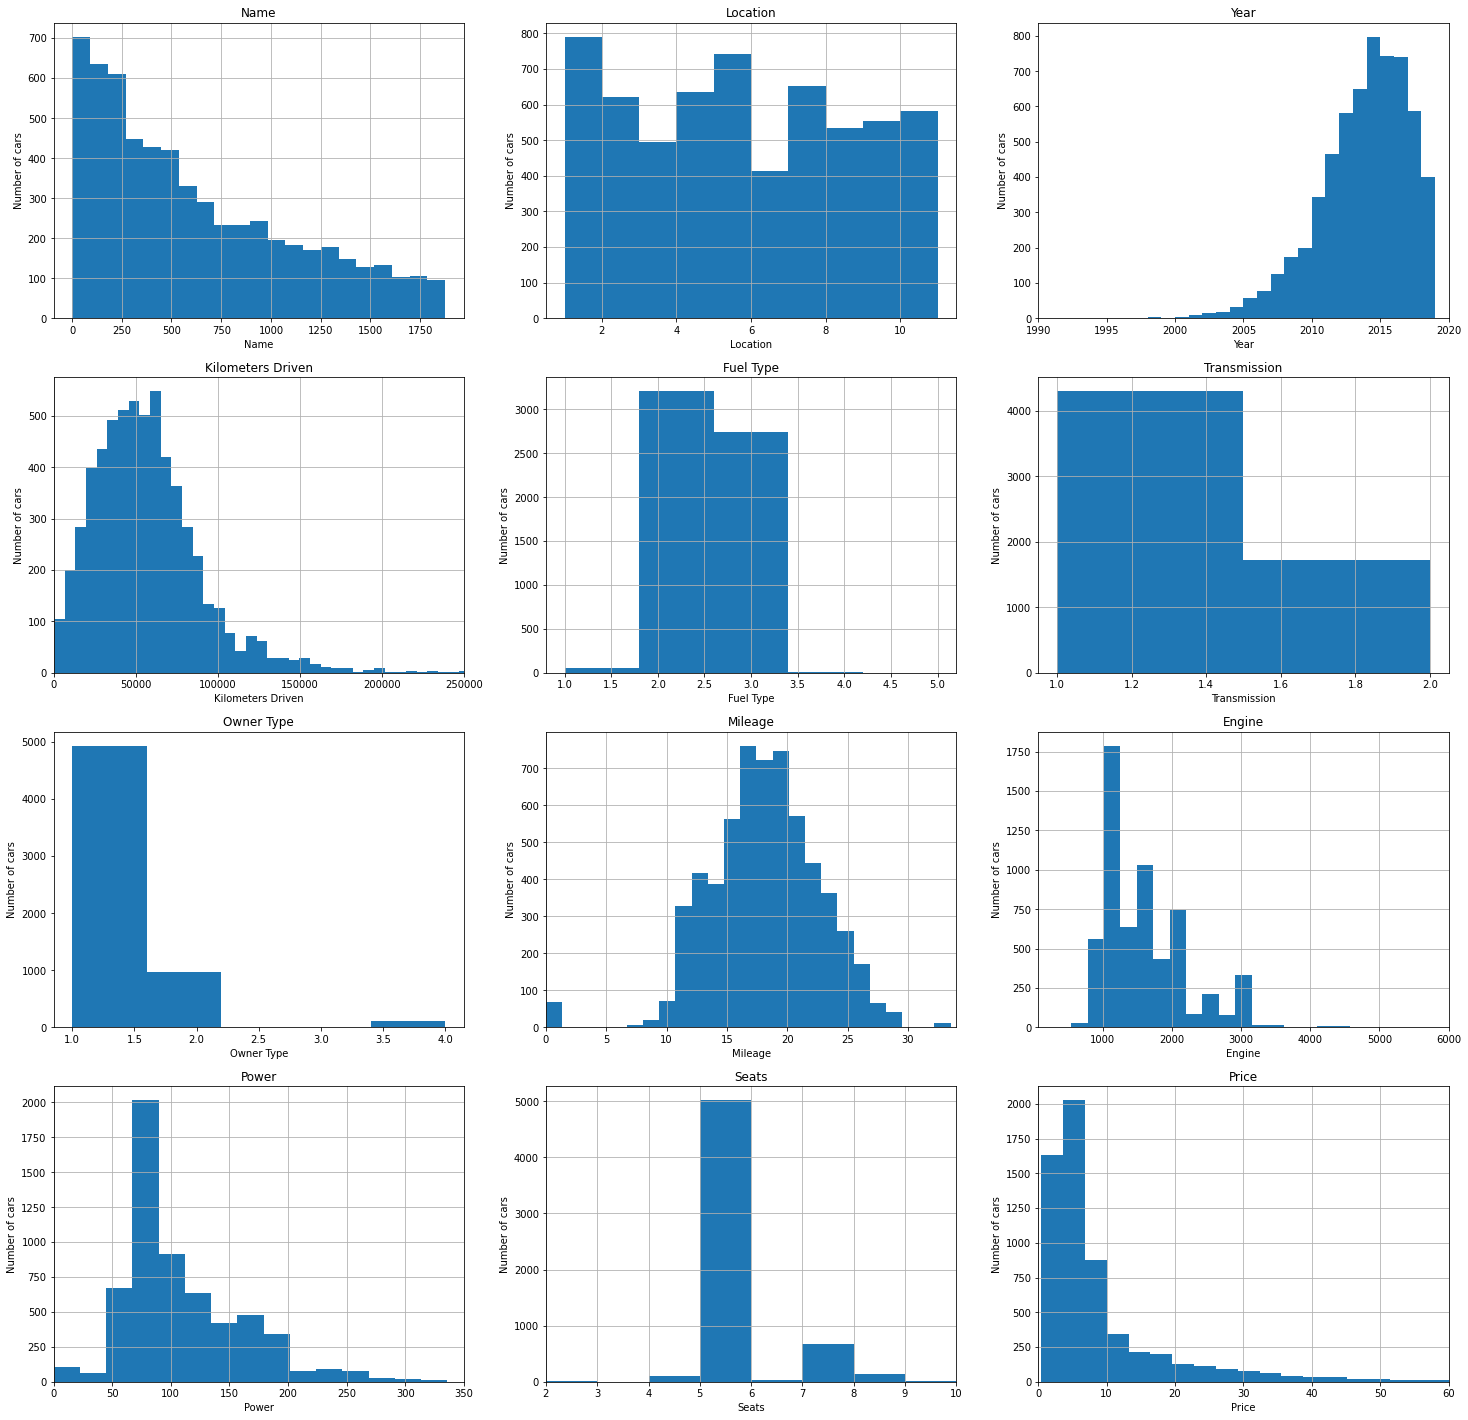

In [7]:
## Graphs:
plt.figure(figsize=(25,25))
## Name:
plt.grid(True)
plt.subplot(431)
axes = plt.gca()
plt.hist(df['Name'], bins=21)
plt.title('Name')
plt.ylabel('Number of cars')
plt.xlabel('Name')
## Location:
plt.grid(True)
plt.subplot(432)
axes = plt.gca()
plt.hist(df['Location'], bins=10)
plt.title('Location')
plt.ylabel('Number of cars')
plt.xlabel('Location')
## Year:
plt.grid(True)
plt.subplot(433)
axes = plt.gca()
axes.set_xlim([1990,2020]) 
plt.hist(df['Year'], bins=21)
plt.title('Year')
plt.ylabel('Number of cars')
plt.xlabel('Year')
## Kilometers driven:
plt.subplot(434)
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,250000]) #we can say that there's allmost zero cars that drove mmore then 250000 km
plt.hist(df['Kilometers_Driven'], bins=1000)
plt.title('Kilometers Driven')
plt.ylabel('Number of cars')
plt.xlabel('Kilometers Driven')
## Fuel type:
plt.grid(True)
plt.subplot(435)
axes = plt.gca()
plt.hist(df['Fuel_Type'], bins=5)
plt.title('Fuel Type')
plt.ylabel('Number of cars')
plt.xlabel('Fuel Type')
## Transmission:
plt.grid(True)
plt.subplot(436)
axes = plt.gca()
plt.hist(df['Transmission'], bins=2)
plt.title('Transmission')
plt.ylabel('Number of cars')
plt.xlabel('Transmission')
## Owner Type:
plt.grid(True)
plt.subplot(437)
axes = plt.gca()
plt.hist(df['Owner_Type'], bins=5)
plt.title('Owner Type')
plt.ylabel('Number of cars')
plt.xlabel('Owner Type')
## Mileage:
plt.subplot(438)
plt.grid(True)
plt.hist(df['Mileage'], bins=25)
axes = plt.gca()
axes.set_xlim([0,34]) 
plt.title('Mileage')
plt.ylabel('Number of cars')
plt.xlabel('Mileage')
## Engine:
plt.subplot(439)
plt.grid(True)
plt.hist(df['Engine'], bins=25)
axes = plt.gca()
axes.set_xlim([70,6000]) 
plt.title('Engine')
plt.ylabel('Number of cars')
plt.xlabel('Engine')
## Power:
plt.subplot(4,3,10)
plt.grid(True)
plt.hist(df['Power'], bins=25)
axes = plt.gca()
axes.set_xlim([0,350]) 
plt.title('Power')
plt.ylabel('Number of cars')
plt.xlabel('Power')
## Seats:
plt.subplot(4,3,11)
plt.grid(True)
plt.hist(df['Seats'], bins=10)
axes = plt.gca()
axes.set_xlim([2,10]) 
plt.title('Seats')
plt.ylabel('Number of cars')
plt.xlabel('Seats')
## Price:
plt.subplot(4,3,12)
plt.grid(True)
plt.hist(df['Price'], bins=50)
axes = plt.gca()
axes.set_xlim([0,60]) 
plt.title('Price')
plt.ylabel('Number of cars')
plt.xlabel('Price')

In [8]:
## Finding nan percentege
df1 = df.shape[0]
df = df.dropna()
df2 = df.shape[0]
na = df1 - df2
napercent = (na * 100)/ df1
if napercent < 1:
    print("The precentege of nan values is lower then 1")
else:
    print("The precentege of nan values is: ", napercent)

The precentege of nan values is lower then 1


Text(0.5, 1.0, 'Box plot  of normalization')

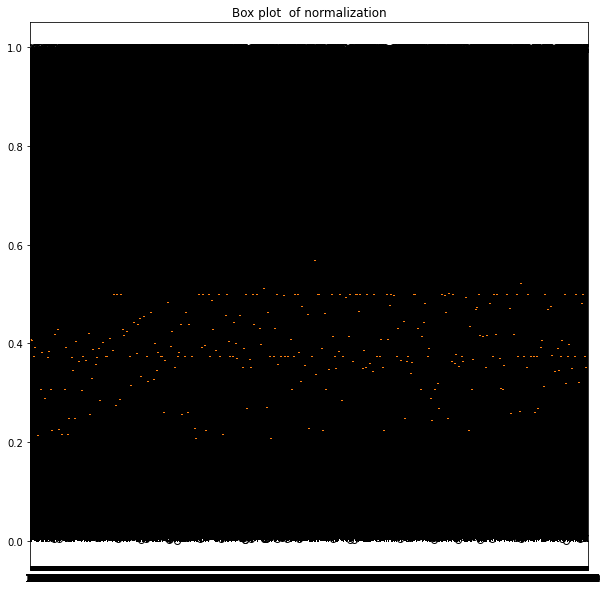

In [10]:
## Normalization of data, BoxPlotting:
maximum = df.max()
Ndf = df / maximum
plt.figure(figsize=(10,10))
plt.boxplot(Ndf)
plt.title('Box plot  of normalization')

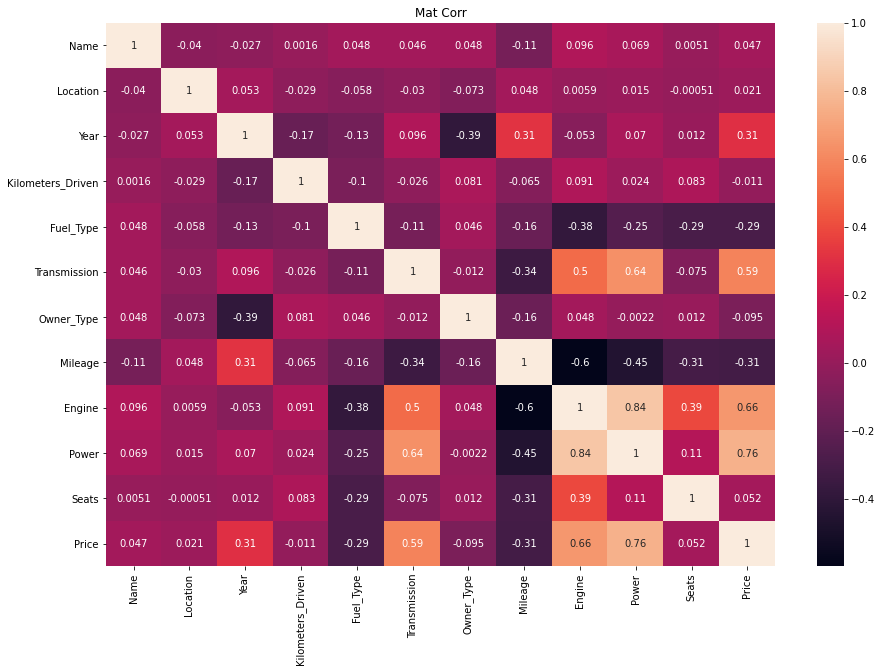

In [11]:
## Corr Matrix creation:
plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Mat Corr')
plt.show()

In [12]:
## Splitting the data:
y = df['Price']
x = df.drop(['Price'], axis = 1)
sc_X = StandardScaler()
x = sc_X.fit_transform(x)
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Minimum error: 0.9514644351464435 at K = 66


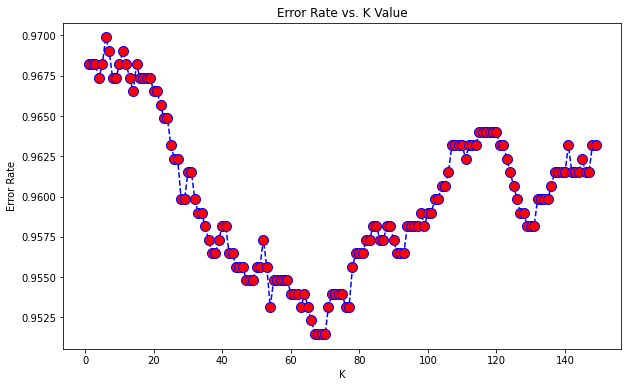

In [13]:
error_rate = []
for i in range(1,150):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='canberra')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,150), error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:", min(error_rate),"at K =", error_rate.index(min(error_rate)))

In [14]:
## Hold Out Cross validation:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)), weights='distance', metric='canberra')
knn.fit(X_train, y_train)
pred_y = knn.predict(X_test)
score = metrics.mean_squared_log_error(y_test, pred_y)
print("error score: ", score)

error score:  0.21161178044655185


[0.15998851 0.00092074 0.27355086 ... 0.29318174 0.08035611 0.0074266 ]
0.18821253901874507


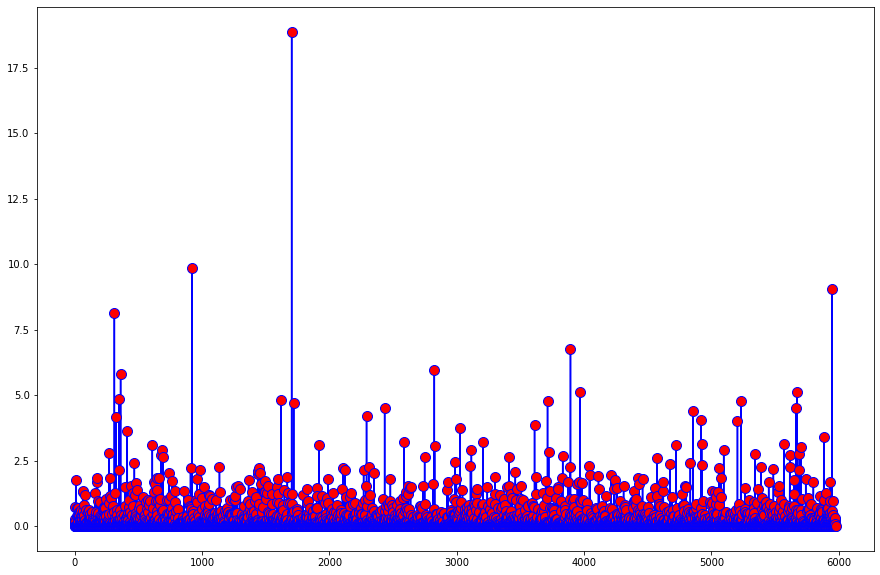

In [15]:
## KNN LOO
cv = LeaveOneOut()
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)), weights='distance', metric='canberra')
knn.fit(X_train, y_train)
scores = cross_val_score(knn, x, y, scoring='neg_mean_squared_log_error', cv=cv) * -1
print(scores)
plt.figure(figsize=(15,10))
plt.plot(scores,color='blue', marker='o',markerfacecolor='red', markersize=10)
print(np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.16793165 0.26121307 0.22674227 0.17519241 0.18181778 0.16384668
 0.17287124 0.17188122 0.15923339 0.21384292]
0.18945726359036671


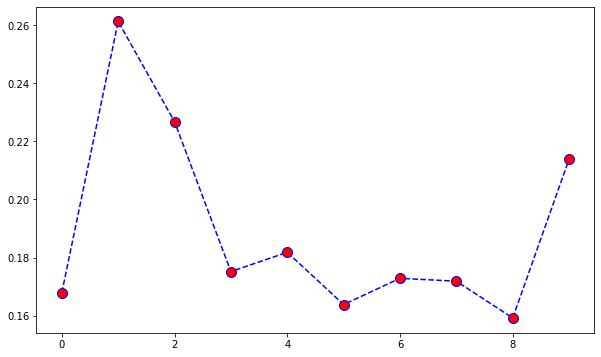

In [16]:
# 10 fold cross validation
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)) ,weights='distance',metric='canberra')
knn.fit(X_train, y_train)
scores = cross_val_score(knn, x, y, scoring='neg_mean_squared_log_error', cv=10) * -1
print(scores)
plt.figure(figsize=(10,6))
plt.plot(scores,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
print(np.mean(scores))

In [ ]:
## finding the best MaxDepth
error_rate = []
for i in range (1,25):
    clf = DecisionTreeClassifier(criterion="gini", max_depth=i)
    clf = clf.fit(X_train, y_train)
    i_pred = clf.predict(X_test)
    error_rate.append(np.mean(i_pred != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,25), error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Max Depth Value')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
print("Minimum error:", min(error_rate),"at Max Depth =", error_rate.index(min(error_rate)))
mini = error_rate.index(min(error_rate))

In [ ]:
## Desicion Trees Hold Out validation:
clf = DecisionTreeClassifier(criterion="gini", max_depth=mini)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = metrics.mean_squared_log_error(y_test, y_pred)
print("error score: ", score)

In [ ]:
## Decision Tree LOO
cv = LeaveOneOut()
clf = DecisionTreeClassifier(criterion="entropy", max_depth=mini)
scores = cross_val_score(clf, x, y, scoring='neg_mean_squared_log_error', cv=cv) * -1
print(scores)
plt.figure(figsize=(25,20))
plt.plot(scores,color='blue', marker='o',markerfacecolor='red', markersize=10)
print(np.mean(scores))

In [ ]:
## Desicion Trees 10-Cross fold:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=mini)
scores = cross_val_score(clf, x, y, scoring='neg_mean_squared_log_error', cv=10) * -1
print(scores)
plt.figure(figsize=(25,20))
plt.plot(scores,color='blue', marker='o',markerfacecolor='red', markersize=10)
print(np.mean(scores))